In [74]:
import os
import sys

# 確保能匯入 src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.load_data import load_data
from src.clean_data import clean_data

df_raw = load_data()
df_clean = clean_data(df_raw)

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset


Slide 1｜不同運動類型的卡路里分布（Boxplot）

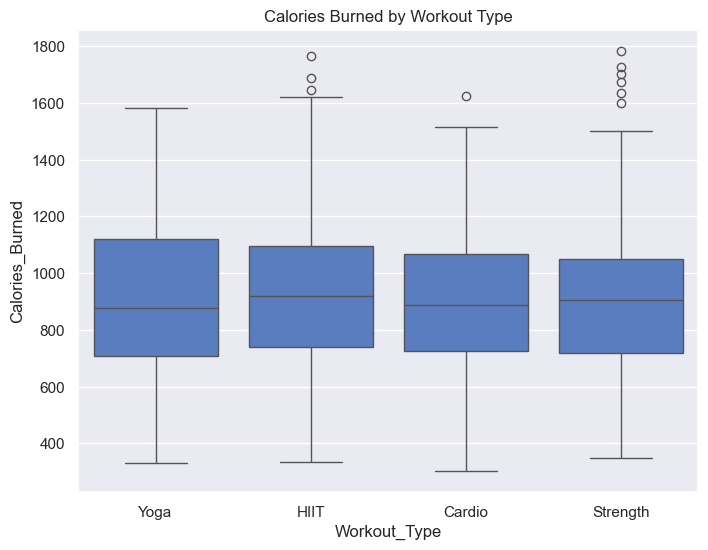

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_clean,
    x="Workout_Type",
    y="Calories_Burned"
)
plt.title("Calories Burned by Workout Type")
plt.show()


資料簡介

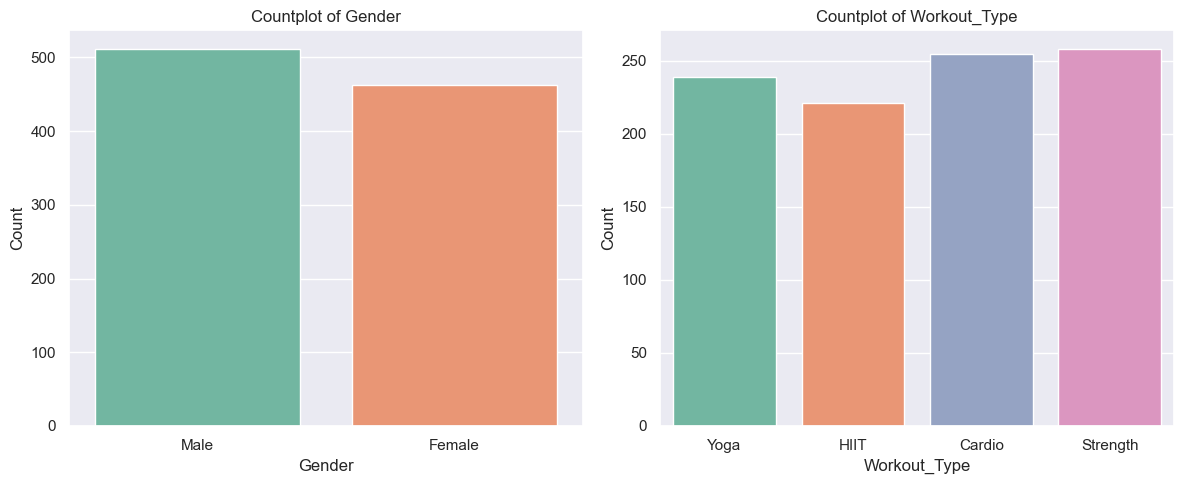

In [124]:
categorical_features = [
    "Gender", 
    "Workout_Type"
]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(
        data=df_clean, 
        x=feature, 
        palette="Set2",
        hue=feature
    )

    plt.title(f"Countplot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [100]:
import pandas as pd
# 將Age分群
df_clean['Age_Group'] = pd.cut(
    df_clean['Age'], 
    bins=[0,25,45,60], 
    labels=['Youth (18~25)','Adult (26~45)','Senior (46~59)']
)
df_clean.groupby("Age_Group")["Age"].describe()

/var/folders/5w/kbt5q6f538b2b17zcdhwsbp40000gn/T/ipykernel_31438/3974842624.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("Age_Group")["Age"].describe()


,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
Youth (18~25),191.0,21.356021,2.323553,18.0,19.0,21.0,23.0,25.0
Adult (26~45),452.0,35.984513,5.867512,26.0,31.0,36.0,41.0,45.0
Senior (46~59),330.0,52.409091,3.843351,46.0,49.0,52.0,56.0,59.0


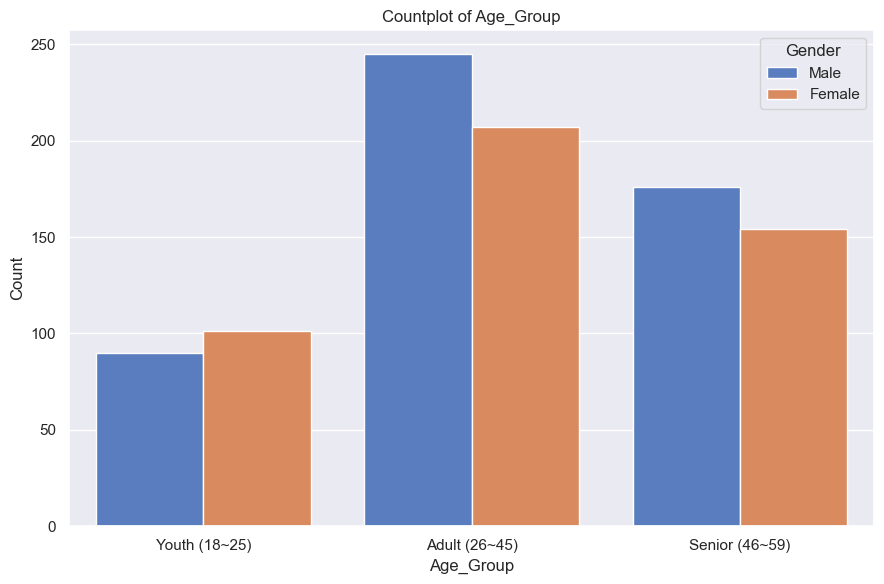

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(
    data=df_clean, 
    x="Age_Group", 
    hue="Gender", 
    palette="muted"
)
plt.title(f"Countplot of Age_Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

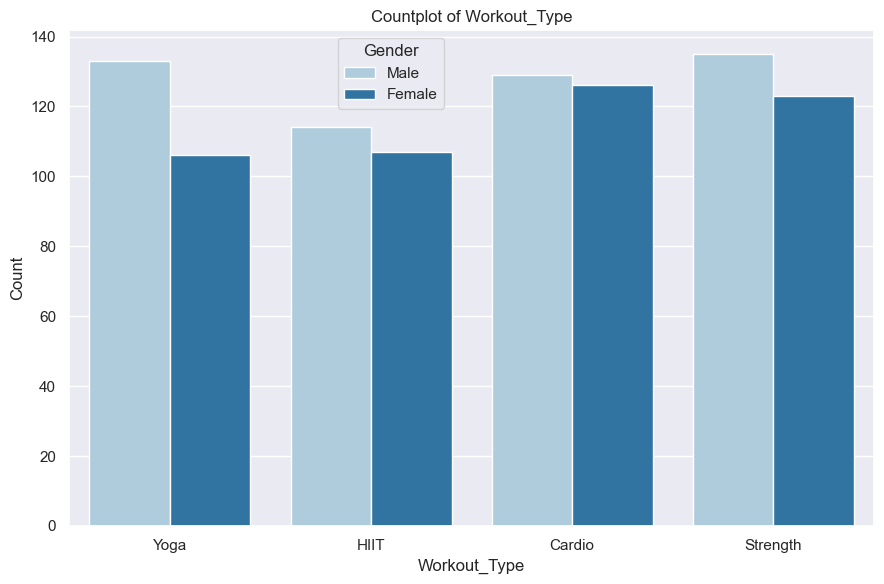

In [79]:
plt.figure(figsize=(9, 6))
sns.countplot(
    data=df_clean, 
    x="Workout_Type", 
    hue="Gender", 
    palette="Paired"
)
plt.title(f"Countplot of Workout_Type")
plt.xlabel("Workout_Type")
plt.ylabel("Count")

# legend圖內上方置中
plt.legend(
    title="Gender", 
    loc="upper center", 
    bbox_to_anchor=(0.4, 1.0)
)

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

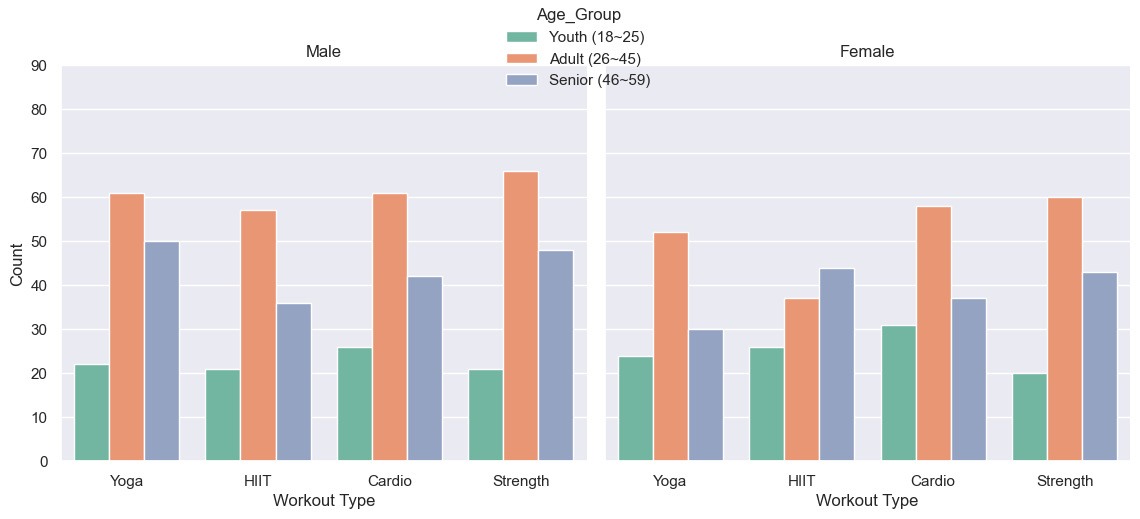

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
g = sns.catplot(
    data=df_clean,
    x="Workout_Type",
    hue="Age_Group",
    col="Gender",        # 依年齡分面(Facet)
    kind="count",
    palette="Set2",
    height=5,
    aspect=1
)
# 重新定位 legend（上方置中）
g._legend.set_bbox_to_anchor((0.5, 1.05))
g._legend.set_loc("upper center")

g.set_titles("{col_name}")
g.set_axis_labels("Workout Type", "Count")
plt.tight_layout()
plt.ylim(0, 90)
plt.show()


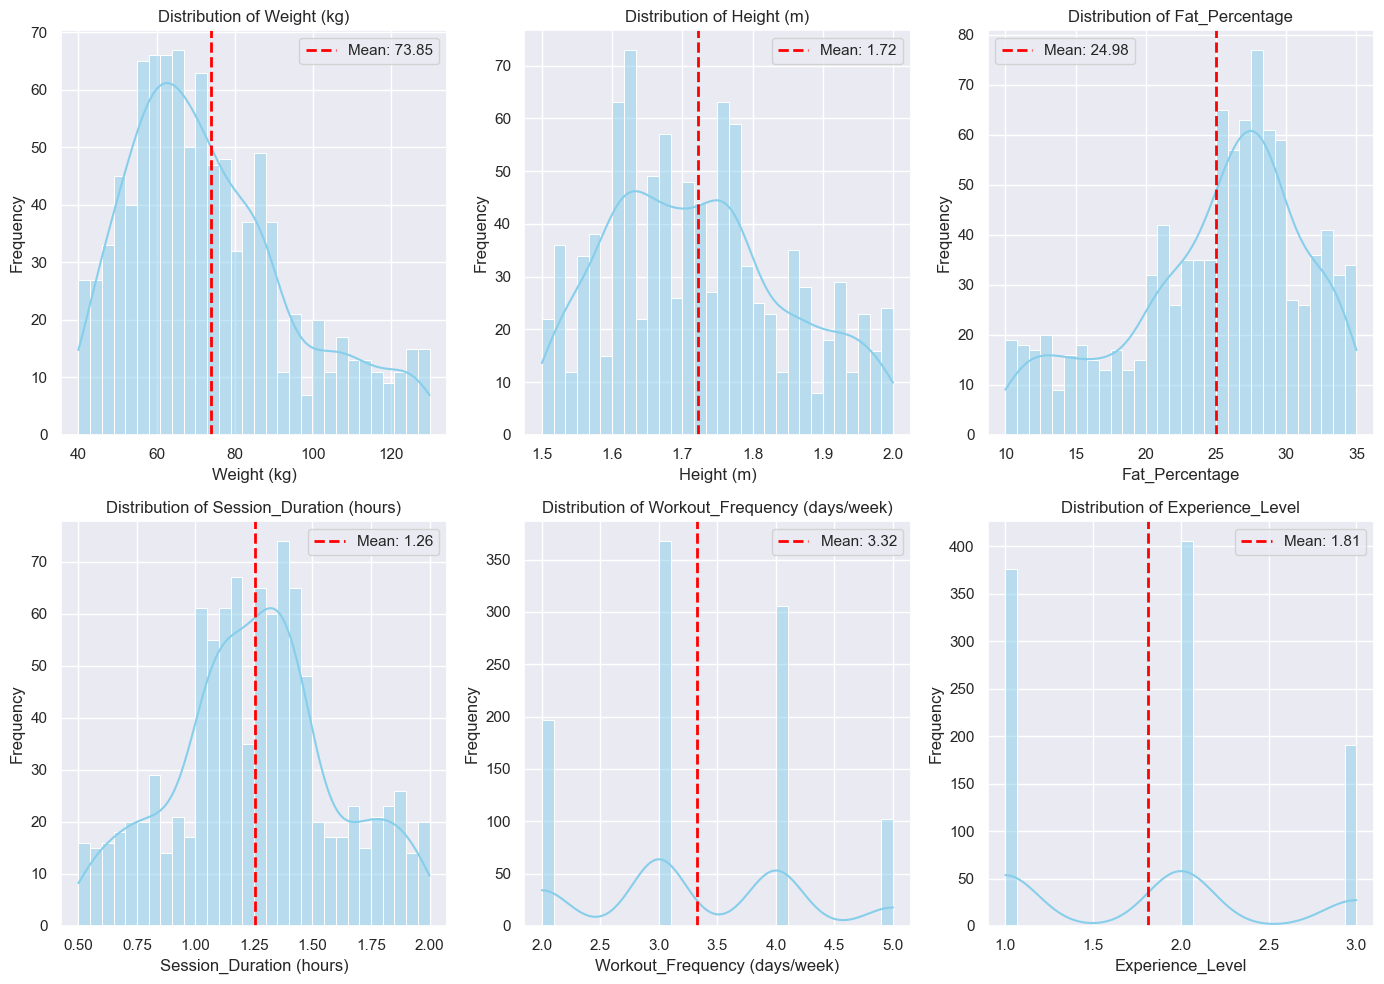

In [ ]:
sns.set_theme(style="darkgrid", palette="muted")
plt.figure(figsize=(14, 10))

num_features = [
     "Weight (kg)", 
     "Height (m)",
     "Fat_Percentage",
     "Session_Duration (hours)",
     "Workout_Frequency (days/week)",
     'Experience_Level'
]

# enumerate() 會同時取出「索引」和「內容」
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    data = df_clean[feature]
    
    # 直方圖 + KDE核密度
    sns.histplot(
        data, 
        kde=True, 
        bins=30, 
        color="skyblue"
    )
    # 平均值線
    mean_val = data.mean()
    plt.axvline(
        mean_val, 
        color="red" , 
        linestyle='--', 
        linewidth=2, 
        label=f'Mean: {mean_val:.2f}'
    )
    
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

Slide 2 建立兩個效率指標

In [82]:
# 建立兩個效率指標
df_clean['Calories_per_hour'] = df_clean['Calories_Burned'] / df_clean['Session_Duration (hours)']
df_clean['Calories_per_heartbeat'] = df_clean['Calories_Burned'] / df_clean['Avg_BPM']

Slide 3 全體相關性

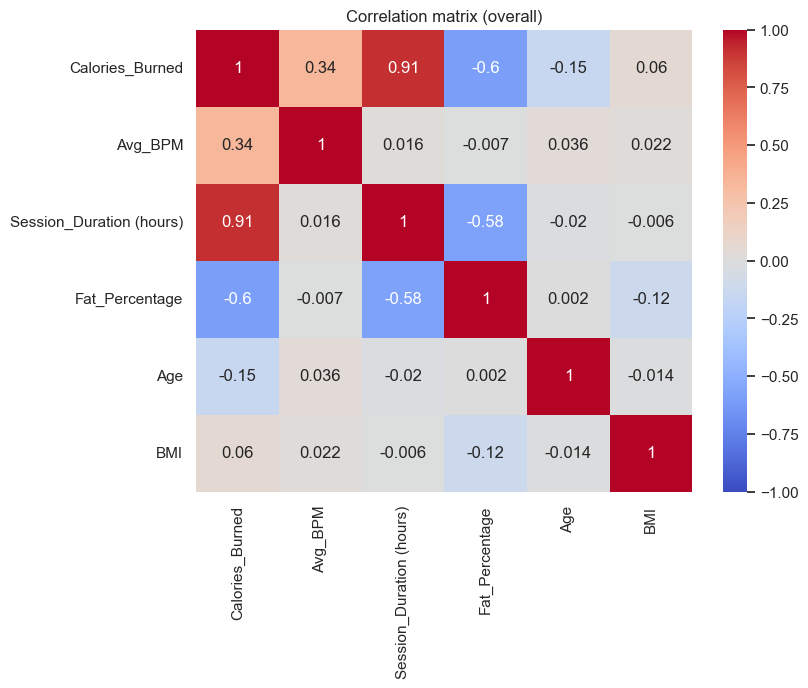

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt
cols = [
    'Calories_Burned',
    'Avg_BPM',
    'Session_Duration (hours)',
    'Fat_Percentage',
    "Age",
    'BMI'
]

# 計算 Pearson correlation，衡量兩個欄位之間的線性關係
corr = df_clean[cols].corr().round(3)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, vmax=1)
plt.title('Correlation matrix (overall)')
plt.show()

Slide 4｜卡路里 vs 平均心率

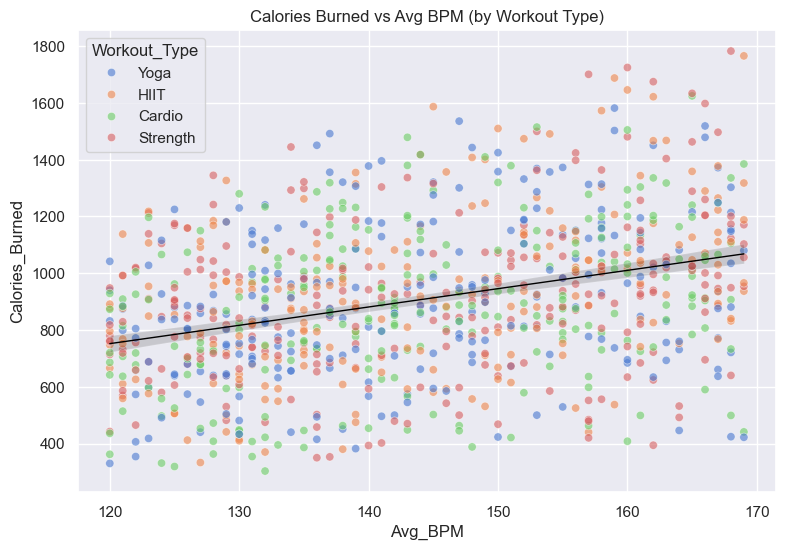

In [84]:
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_clean, x='Avg_BPM', y='Calories_Burned', hue='Workout_Type', alpha=0.6)
sns.regplot(data=df_clean, x='Avg_BPM', y='Calories_Burned', scatter=False, color='black', line_kws={'linewidth':1})
plt.title('Calories Burned vs Avg BPM (by Workout Type)')
plt.show()

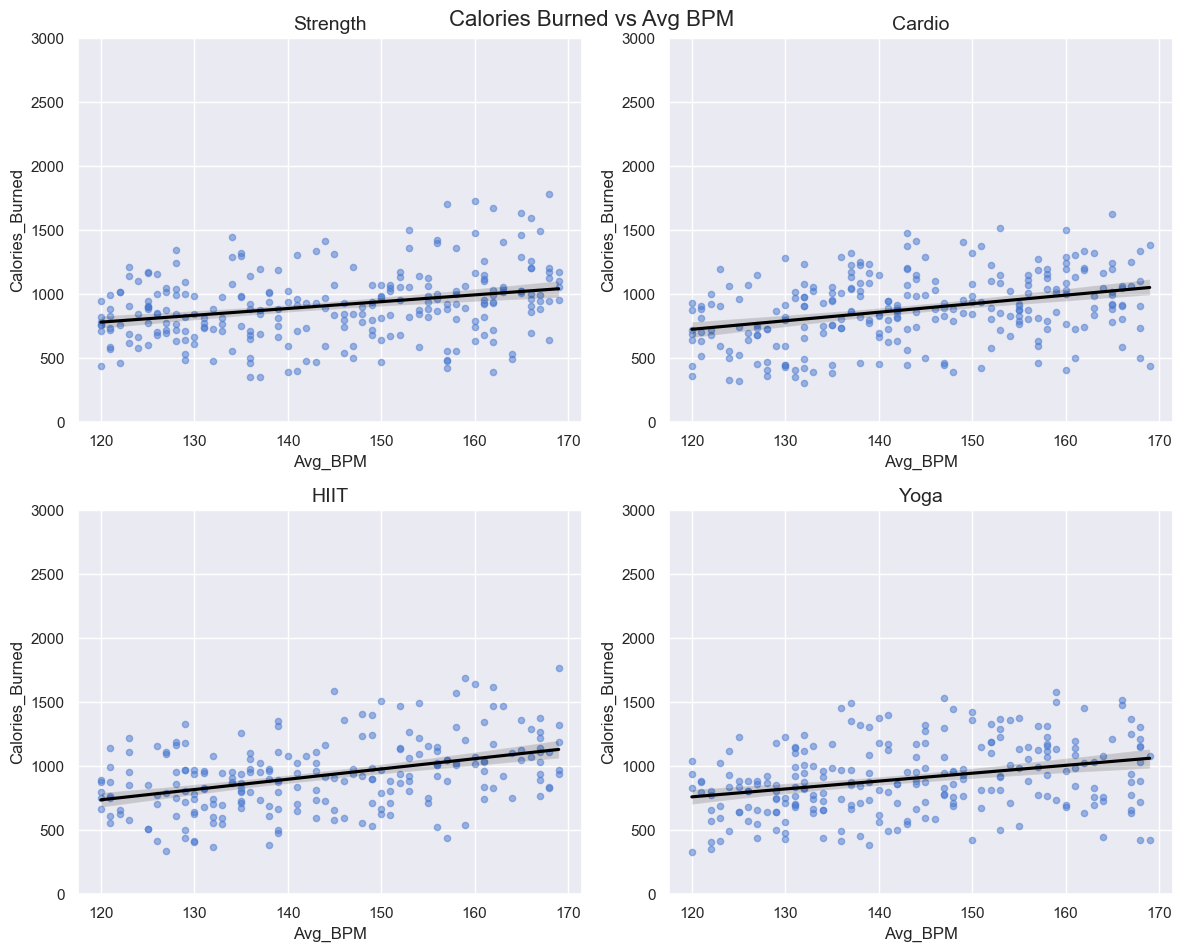

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
workouts = ['Strength', 'Cardio', 'HIIT', 'Yoga']

for i, w in enumerate(workouts, 1):
    plt.subplot(2, 2, i)
    subset = df_clean[df_clean['Workout_Type'] == w]
    sns.regplot(
        data=subset,
        x='Avg_BPM',
        y='Calories_Burned',
        scatter_kws={'alpha': 0.5, 's': 20},
        line_kws={'color': 'black'},
    )
    plt.title(f"{w}", fontsize=14)
    plt.xlabel("Avg_BPM")
    plt.ylabel("Calories_Burned")
    plt.ylim(0, 3000)

plt.suptitle("Calories Burned vs Avg BPM", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

Slide 5｜卡路里 vs 運動時長

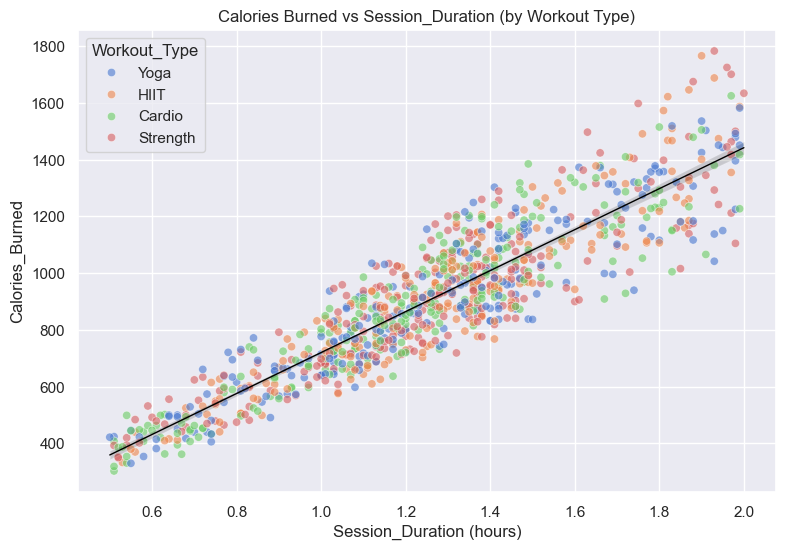

In [86]:
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_clean, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', alpha=0.6)
sns.regplot(data=df_clean, x='Session_Duration (hours)', y='Calories_Burned', scatter=False, color='black', line_kws={'linewidth':1})
plt.title('Calories Burned vs Session_Duration (by Workout Type)')
plt.show()

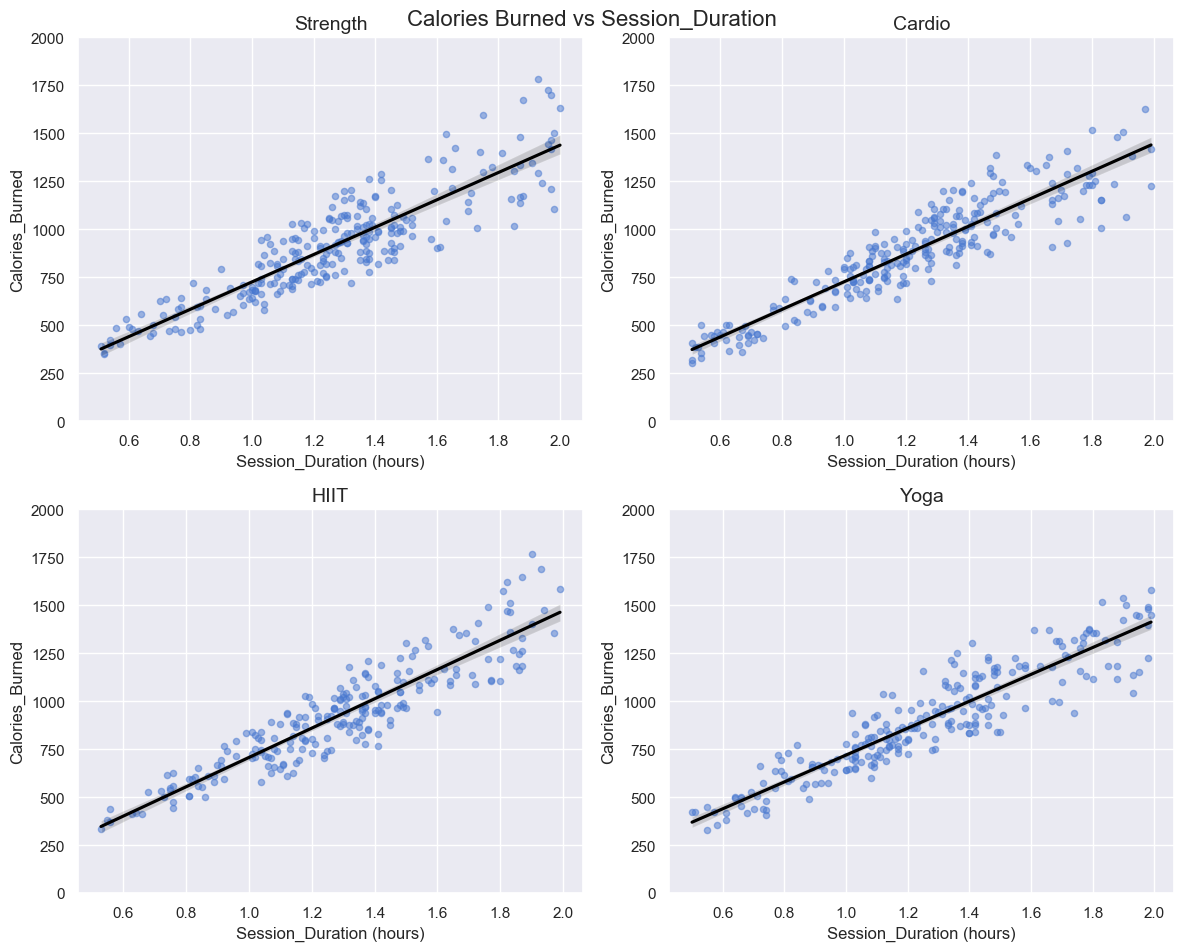

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
workouts = ['Strength', 'Cardio', 'HIIT', 'Yoga']

for i, w in enumerate(workouts, 1):
    plt.subplot(2, 2, i)
    subset = df_clean[df_clean['Workout_Type'] == w]
    sns.regplot(
        data=subset,
        x='Session_Duration (hours)',
        y='Calories_Burned',
        scatter_kws={'alpha': 0.5, 's': 20},
        line_kws={'color': 'black'},
    )
    plt.title(f"{w}", fontsize=14)
    plt.xlabel("Session_Duration (hours)")
    plt.ylabel("Calories_Burned")
    plt.ylim(0, 2000)

plt.suptitle("Calories Burned vs Session_Duration", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

Slide 7｜族群差異：Gender × Age_Group

In [88]:
import pandas as pd
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=[0,25,45,120], labels=['Youth','Adult','Senior'])
df_clean.groupby("Age_Group")["Age"].describe()

/var/folders/5w/kbt5q6f538b2b17zcdhwsbp40000gn/T/ipykernel_31438/3501719651.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("Age_Group")["Age"].describe()


,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
Youth,191.0,21.356021,2.323553,18.0,19.0,21.0,23.0,25.0
Adult,452.0,35.984513,5.867512,26.0,31.0,36.0,41.0,45.0
Senior,330.0,52.409091,3.843351,46.0,49.0,52.0,56.0,59.0


In [119]:
df_clean["Session_Duration (hours)"].describe()

count    973.000000
mean       1.256423
std        0.343033
min        0.500000
25%        1.040000
50%        1.260000
75%        1.460000
max        2.000000
Name: Session_Duration (hours), dtype: float64

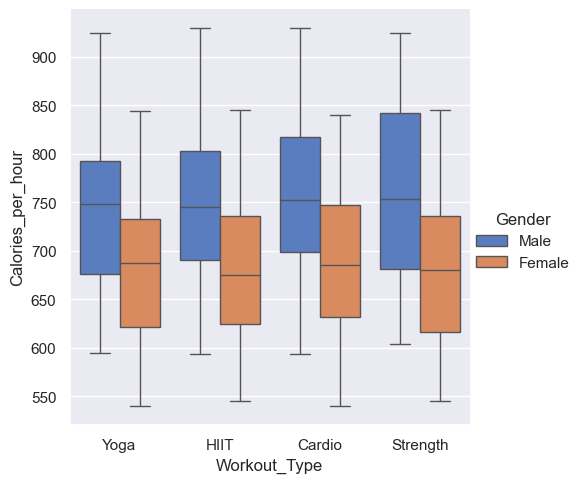

In [106]:
sns.catplot(
    data=df_clean, 
    x="Workout_Type", 
    y="Calories_per_hour", 
    hue='Gender',
    kind="box")

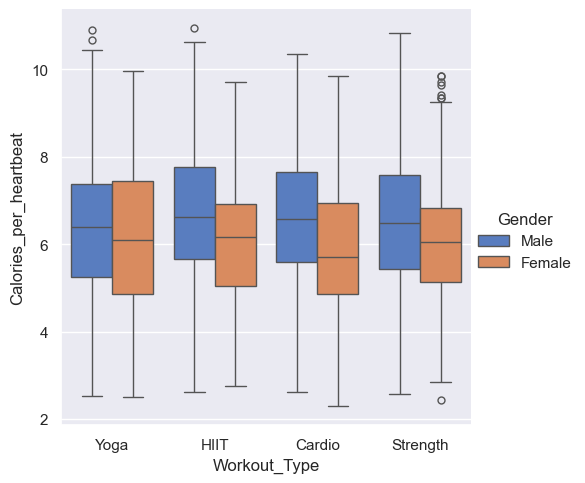

In [108]:
sns.catplot(
    data=df_clean, 
    x="Workout_Type", 
    y="Calories_per_heartbeat", 
    hue='Gender',
    kind="box")

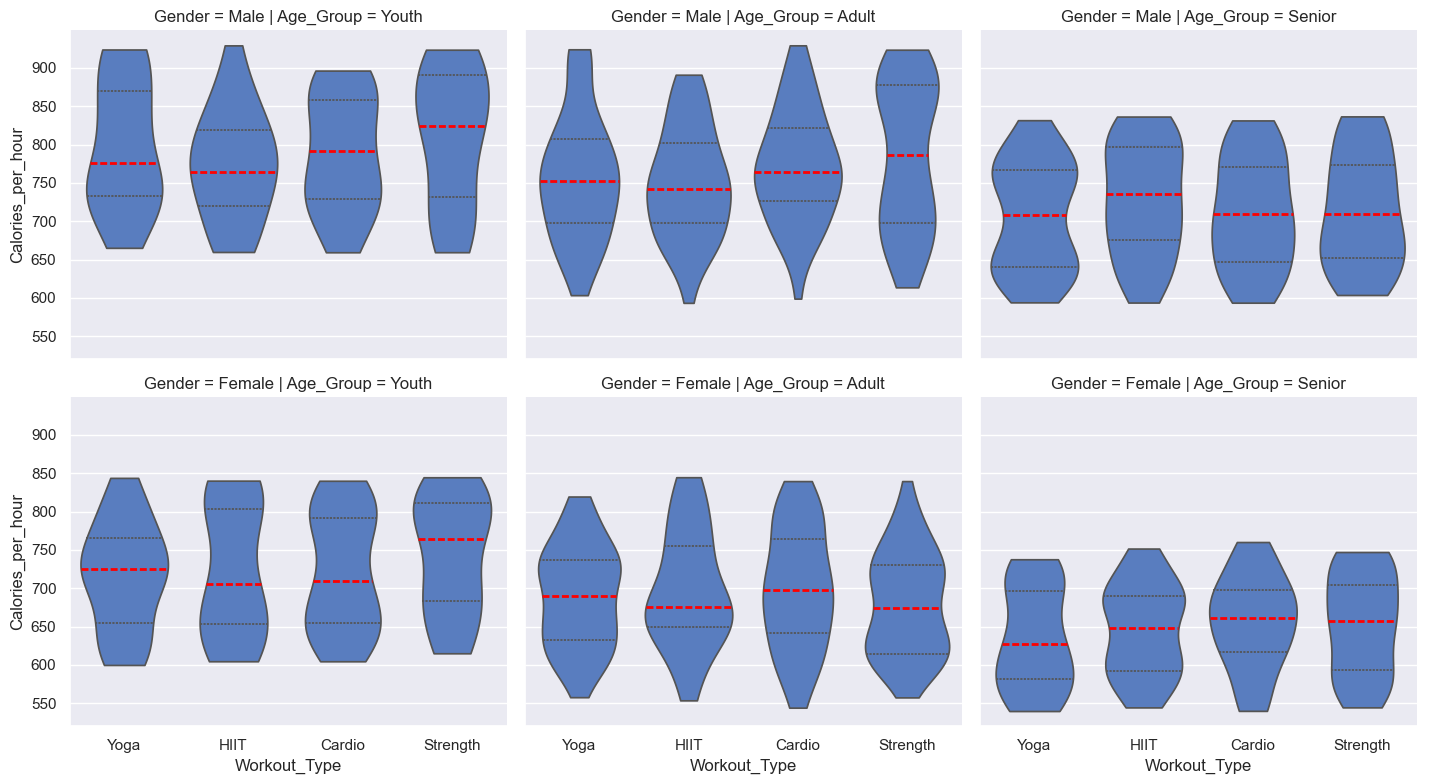

In [ ]:
g = sns.catplot( 
        data=df_clean, 
        x="Workout_Type", 
        y="Calories_per_hour", 
        kind="violin", 
        cut=0, 
        inner="quartile", 
        col="Age_Group", 
        row="Gender", 
        height=4, aspect=1.2 )
# 遍歷所有子圖，將中位數線（quartile）改成紅色
for ax in g.axes.flatten():
    lines = ax.lines
    for i in range(1, len(lines), 3):
        lines[i].set_color("red")
        lines[i].set_linewidth(2)

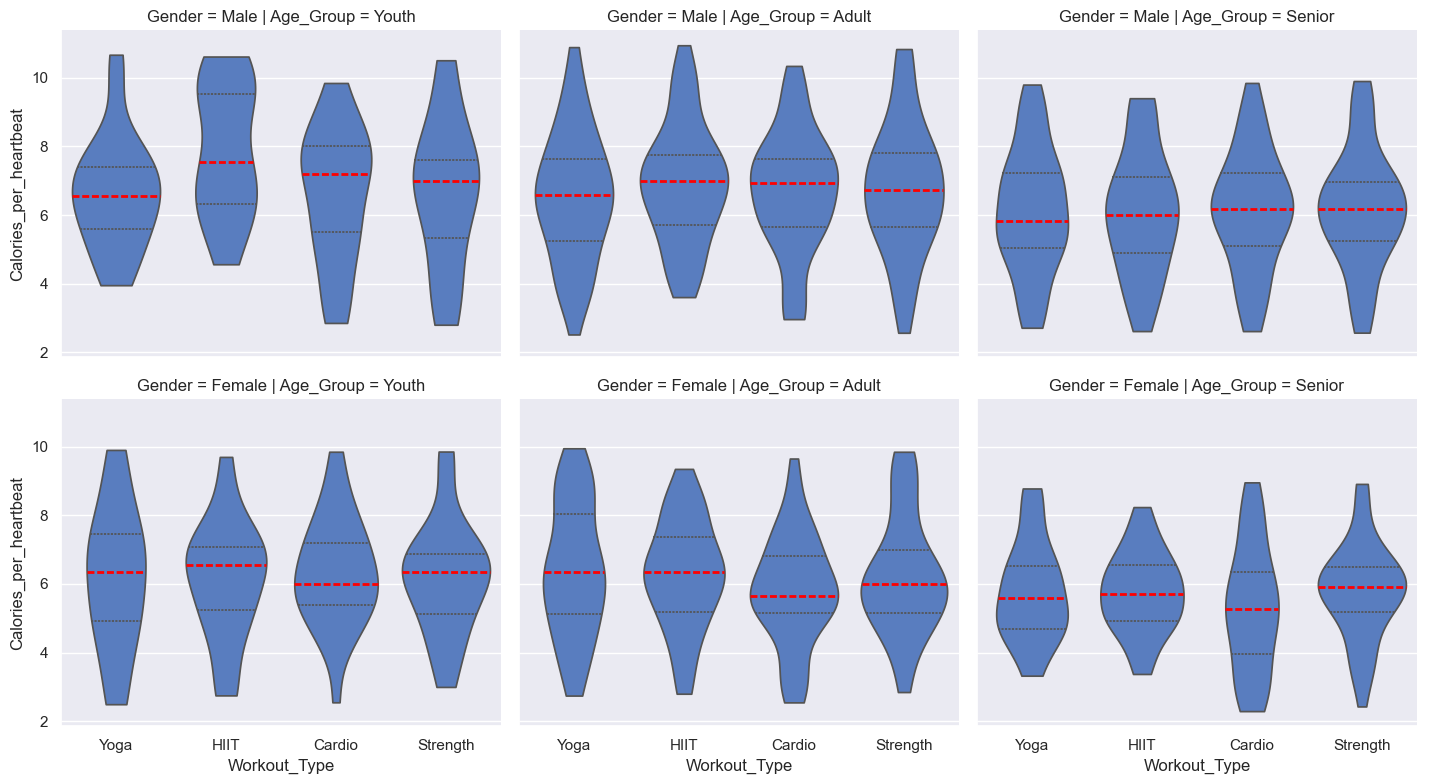

In [90]:
g = sns.catplot( 
        data=df_clean, 
        x="Workout_Type", 
        y="Calories_per_heartbeat", 
        kind="violin", 
        cut=0, 
        inner="quartile", 
        col="Age_Group", 
        row="Gender", 
        height=4, aspect=1.2 )
# 遍歷所有子圖，將中位數線（quartile）改成紅色
for ax in g.axes.flatten():
    lines = ax.lines
    for i in range(1, len(lines), 3):
        lines[i].set_color("red")
        lines[i].set_linewidth(2)

In [91]:
summary = df_clean.groupby('Workout_Type').agg({
    'Calories_Burned':'mean',
    'Calories_per_hour':'median',
    'Avg_BPM':'mean',
    'Session_Duration (hours)':'mean'
}).round(2)

summary

,Calories_Burned,Calories_per_hour,Avg_BPM,Session_Duration (hours)
Workout_Type,,,,
Cardio,884.51,717.78,143.89,1.22
HIIT,925.81,707.64,143.52,1.29
Strength,910.70,713.74,144.31,1.26
Yoga,903.19,720.30,143.27,1.26
